# EE 596 Summer HW3: NEWS RECOMMENDATION

**Qingchuan Hou**

## Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X = pd.DataFrame(np.load('data/X.npy', allow_pickle=True))
# X_test = pd.DataFrame(np.load('data/X_evaluation.npy', allow_pickle=True))

X = pd.DataFrame(np.load('data/X_new.npy', allow_pickle=True)).transpose()
x_test = pd.DataFrame(np.load('data/X_evaluation_new.npy', allow_pickle=True)).transpose()
Y = pd.DataFrame(np.load('data/Y.npy', allow_pickle=True))

print(X.shape, x_test.shape, Y.shape)


(38128, 2) (9533, 2) (38128, 1)


### X Processing

In [3]:
X

,0,1
0,"Arians, Winston talk Hargreaves release",The Bucs' head coach and starting quarterback ...
1,"Today's prayer for Nov. 14, 2019","Holy God, give us faith and courage to take th..."
2,QB Gardner Minshew to appear on Jags Report Li...,Jacksonville Jaguars' quarterback Gardner Mins...
3,Former public defender Rachel Rossi latest to ...,A former public defender is entering the race ...
4,Falcons defense vs. Panthers offense: Who wins...,Can Atlanta slow down Christian McCaffrey?
...,...,...
38123,Lower income neighborhoods have bigger mosquit...,As if life wasn't already challenging enough f...
38124,Federal judge to hear final input from Kim Ogg...,Loetha McGruder spent a long weekend separated...
38125,Jim Edmonds Calls Meghan King Edmonds 'Truly S...,"Jim Edmonds Speaks Out, Calls Meghan King Edmo..."
38126,'He's hungry': Warriors' D'Angelo Russell soak...,"Golden State Warriors guard D'Angelo Russell, ..."


In [4]:
X.columns = ['title', 'abstract']
X.head(1)

,title,abstract
0,"Arians, Winston talk Hargreaves release",The Bucs' head coach and starting quarterback ...


In [5]:
X['all_text'] = X['title'] + ' ' +  X['abstract']
X = X['all_text']
X

0        Arians, Winston talk Hargreaves release The Bu...
1        Today's prayer for Nov. 14, 2019 Holy God, giv...
2        QB Gardner Minshew to appear on Jags Report Li...
3        Former public defender Rachel Rossi latest to ...
4        Falcons defense vs. Panthers offense: Who wins...
                               ...                        
38123    Lower income neighborhoods have bigger mosquit...
38124    Federal judge to hear final input from Kim Ogg...
38125    Jim Edmonds Calls Meghan King Edmonds 'Truly S...
38126    'He's hungry': Warriors' D'Angelo Russell soak...
38127    ISIS Remains Potent, Deadly Despite Baghdadi's...
Name: all_text, Length: 38128, dtype: object

In [6]:
x_test.columns = ['title', 'abstract']

x_test['all_text'] = x_test['title'] + ' ' +  x_test['abstract']
x_test = x_test['all_text']

### Y Processing

In [7]:
Y

,0
0,sports
1,lifestyle
2,sports
3,news
4,sports
...,...
38123,health
38124,news
38125,tv
38126,sports


### Train and Validation Dataset Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=33)

### TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.6, min_df=1)


In [12]:
tfidf_vect.fit(X)

x_train_tfidf = tfidf_vect.transform(x_train)
x_valid_tfidf = tfidf_vect.transform(x_valid)
x_test_tfidf = tfidf_vect.transform(x_test)

## SVM

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [14]:
SVM_model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [15]:
SVM_model.fit(x_train_tfidf, y_train)

/Users/qingchuanhou/opt/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto', kernel='linear')

### Validation

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [17]:
y_valid_predicted = SVM_model.predict(x_valid_tfidf)

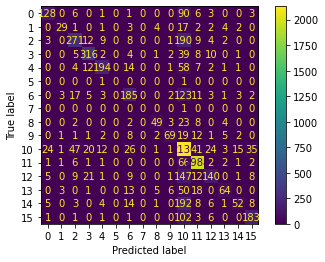

In [18]:
cm = confusion_matrix(y_valid, y_valid_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [19]:
print('accuracy_score',accuracy_score(y_valid,y_valid_predicted))

accuracy_score 0.7602937319695777


## Kaggle test prediction

In [20]:
y_test_predicted = SVM_model.predict(x_test_tfidf)

In [21]:
df = pd.DataFrame()
df['Prediction'] = y_test_predicted
df.index.name = 'idx'

In [22]:
df.to_csv('prediction.csv')